In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

In [0]:
dataset=MNIST(root="/content/drive/My Drive/MNIST Dataset/",train=True,transform=transforms.ToTensor())

In [0]:
test_ds=MNIST(root='/content/drive/My Drive/MNIST Dataset/',train=False,transform=transforms.ToTensor())

In [0]:
from torch.utils.data import random_split

In [0]:
train_ds,val_ds=random_split(dataset,[50000,10000])

In [0]:
print('train:',len(train_ds),'\ntest:',len(val_ds),'\nval:',len(test_ds))

train: 50000 
test: 10000 
val: 10000


In [0]:
img,label=train_ds[0]

In [0]:
img.shape,label

(torch.Size([1, 28, 28]), 9)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

label:  9


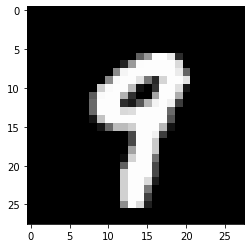

In [0]:
plt.imshow(img[0],cmap='gray')
print('label: ',label)

In [0]:
from torch.utils.data import DataLoader

In [0]:
batch_size=128
train_l=DataLoader(train_ds,batch_size,shuffle=True)
val_l=DataLoader(val_ds,batch_size)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class MNISTmodel(nn.Module):
  def __init__(self,input_size,num_classes):
    super().__init__()
    self.input_size=input_size
    self.linear=nn.Linear(self.input_size,num_classes)
  def forward(self,xb):
    xb=xb.reshape(-1,self.input_size)
    out=self.linear(xb)
    return out
  def training_step(self,batch):
    imgs,labels=batch
    out=self(imgs)
    return F.cross_entropy(out,labels)
  def accuracy(self,pred,label):
    a,b=torch.max(pred,dim=1)
    return torch.tensor(torch.sum(b==label).item()/label.numel())
  def validate(self,batch):
    imgs,labels=batch
    out=self(imgs)
    return {'loss':F.cross_entropy(out,labels),'accuracy':self.accuracy(out,labels)}
  def validate_epoch(self,batch_eval):
    loss_batches=[x['loss'] for x in batch_eval]
    loss_tot=torch.stack(loss_batches).mean()
    acc_batches=[x['accuracy'] for x in batch_eval]
    acc_tot=torch.stack(acc_batches).mean()
    return {'loss':loss_tot.item(),'accuracy':acc_tot.item()}
  def epoch_end(self,epoch,res):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, res['loss'], res['accuracy']))
  def evaluate(self,val_l):
    batch_eval=[self.validate(x) for x in val_l]
    return self.validate_epoch(batch_eval)
  def fit(self,epochs,lr,train_l,val_l,opt_func=torch.optim.SGD):
    history=[]
    opt=opt_func(self.parameters(),lr)
    for epoch in range(epochs):
      for batch in train_l:
        loss=self.training_step(batch)
        loss.backward()
        opt.step()
        opt.zero_grad()
      result=self.evaluate(val_l)
      self.epoch_end(epoch,result)
      history.append(result)
    return history

In [0]:
model1=MNISTmodel(28*28,10)

In [0]:
res0=model1.evaluate(val_l)
res0

{'accuracy': 0.05686313286423683, 'loss': 2.3314664363861084}

In [0]:
history1=model1.fit(10,0.001,train_l,val_l)

Epoch [0], val_loss: 1.9634, val_acc: 0.6042
Epoch [1], val_loss: 1.6949, val_acc: 0.7110
Epoch [2], val_loss: 1.4939, val_acc: 0.7463
Epoch [3], val_loss: 1.3416, val_acc: 0.7706
Epoch [4], val_loss: 1.2240, val_acc: 0.7873
Epoch [5], val_loss: 1.1313, val_acc: 0.7997
Epoch [6], val_loss: 1.0568, val_acc: 0.8106
Epoch [7], val_loss: 0.9958, val_acc: 0.8161
Epoch [8], val_loss: 0.9449, val_acc: 0.8230
Epoch [9], val_loss: 0.9017, val_acc: 0.8271


In [0]:
history2=model1.fit(10,0.001,train_l,val_l)

Epoch [0], val_loss: 0.8648, val_acc: 0.8317
Epoch [1], val_loss: 0.8328, val_acc: 0.8362
Epoch [2], val_loss: 0.8047, val_acc: 0.8393
Epoch [3], val_loss: 0.7799, val_acc: 0.8429
Epoch [4], val_loss: 0.7578, val_acc: 0.8450
Epoch [5], val_loss: 0.7379, val_acc: 0.8473
Epoch [6], val_loss: 0.7200, val_acc: 0.8493
Epoch [7], val_loss: 0.7037, val_acc: 0.8508
Epoch [8], val_loss: 0.6889, val_acc: 0.8527
Epoch [9], val_loss: 0.6753, val_acc: 0.8544


In [0]:
history3=model1.fit(10,0.01,train_l,val_l)

Epoch [0], val_loss: 0.5823, val_acc: 0.8658
Epoch [1], val_loss: 0.5298, val_acc: 0.8709
Epoch [2], val_loss: 0.4953, val_acc: 0.8781
Epoch [3], val_loss: 0.4707, val_acc: 0.8810
Epoch [4], val_loss: 0.4520, val_acc: 0.8846
Epoch [5], val_loss: 0.4372, val_acc: 0.8882
Epoch [6], val_loss: 0.4247, val_acc: 0.8895
Epoch [7], val_loss: 0.4146, val_acc: 0.8921
Epoch [8], val_loss: 0.4061, val_acc: 0.8934
Epoch [9], val_loss: 0.3984, val_acc: 0.8949


In [0]:
history4=model1.fit(10,0.05,train_l,val_l)

Epoch [0], val_loss: 0.3724, val_acc: 0.8998
Epoch [1], val_loss: 0.3561, val_acc: 0.9046
Epoch [2], val_loss: 0.3446, val_acc: 0.9053
Epoch [3], val_loss: 0.3356, val_acc: 0.9078
Epoch [4], val_loss: 0.3295, val_acc: 0.9097
Epoch [5], val_loss: 0.3243, val_acc: 0.9110
Epoch [6], val_loss: 0.3198, val_acc: 0.9116
Epoch [7], val_loss: 0.3157, val_acc: 0.9135
Epoch [8], val_loss: 0.3125, val_acc: 0.9134
Epoch [9], val_loss: 0.3100, val_acc: 0.9157


In [0]:
res1=model1.evaluate(val_l)

In [0]:
res1

{'accuracy': 0.9157436490058899, 'loss': 0.30997034907341003}

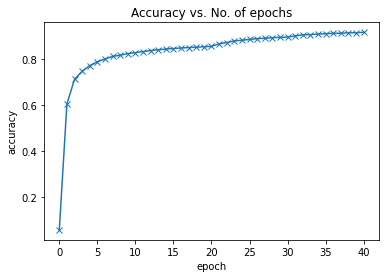

In [0]:
# Replace these values with your results
history = [res0] + history1 + history2 + history3 + history4
accuracies = [result['accuracy'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [0]:
model=MNISTmodel(28*28,10)

In [0]:
res00=model.evaluate(val_l)
res00

{'accuracy': 0.14072389900684357, 'loss': 2.289681911468506}

In [0]:
history11=model.fit(10,0.05,train_l,val_l)

Epoch [0], val_loss: 0.4956, val_acc: 0.8770
Epoch [1], val_loss: 0.4153, val_acc: 0.8906
Epoch [2], val_loss: 0.3825, val_acc: 0.8975
Epoch [3], val_loss: 0.3621, val_acc: 0.9016
Epoch [4], val_loss: 0.3490, val_acc: 0.9046
Epoch [5], val_loss: 0.3398, val_acc: 0.9081
Epoch [6], val_loss: 0.3324, val_acc: 0.9087
Epoch [7], val_loss: 0.3265, val_acc: 0.9103
Epoch [8], val_loss: 0.3212, val_acc: 0.9123
Epoch [9], val_loss: 0.3178, val_acc: 0.9125


In [0]:
res11=model.evaluate(val_l)
res11

{'accuracy': 0.9124802350997925, 'loss': 0.3177972733974457}

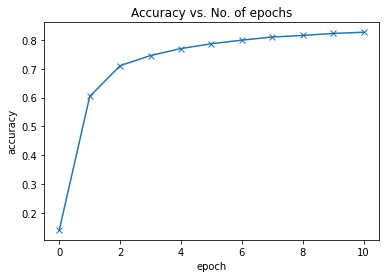

In [0]:
# Replace these values with your results
history1 = [res00] + history1
accuracies = [result['accuracy'] for result in history1]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [0]:
test_l=DataLoader(test_ds,batch_size=256)

In [0]:
result=model.accuracy1(test_l)
result

{'accuracy': 0.916210949420929, 'loss': 0.3018121123313904}

In [0]:
result1=model1.accuracy1(test_l)
result1

{'accuracy': 0.9180663824081421, 'loss': 0.2948147654533386}

In [0]:
torch.save(model1.state_dict(), '/content/drive/My Drive/DevOps/PyTorch/JupyterNotebooks/03-logistic-regression/mnist-logistic.pth')

In [0]:
torch.save(model1,'/content/drive/My Drive/DevOps/PyTorch/JupyterNotebooks/03-logistic-regression/TrainedModel.model')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type MNISTmodel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
mod=torch.load('/content/drive/My Drive/DevOps/PyTorch/JupyterNotebooks/03-logistic-regression/TrainedModel.model')

In [0]:
test=mod.accuracy1(test_l)
test

{'accuracy': 0.9180663824081421, 'loss': 0.2948147654533386}